# Bank data analysis (Long term bank deposit)

The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  
Make feature engineering but also try differnet models in order to get as much accuracy as possible.


1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [282]:
import pandas as pd
import sklearn

In [283]:
df = pd.read_csv('dataset.csv', sep=';', header=0)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [284]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in df.columns:
    if is_numeric_dtype(df[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in df.columns:
    if is_string_dtype(df[column]):
        print(column)

Numeric columns
age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
----------------------------------
Category columns
job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


In [285]:
missing = df.isnull().sum()
print(missing)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [286]:
X = df.drop("y", axis=1)
y = df['y']

In [287]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [288]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

## Explanatory Data Analysis - EDA

## Univariate Analysis

In [289]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [290]:
# Output variable
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Text(0.5, 1.0, 'Class')

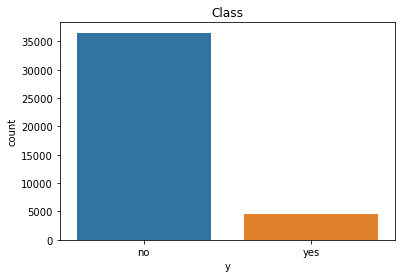

In [291]:
ax = sns.countplot(df['y'])
ax.set_title('Class')

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

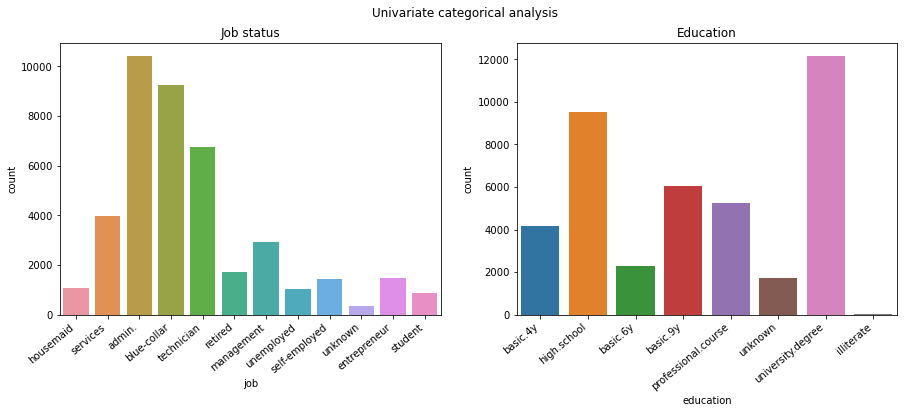

In [292]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate categorical analysis')

ax = sns.countplot(ax = axes[0], x = df.job)
axes[0].set_title('Job status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax2 = sns.countplot(ax = axes[1],x = df.education)
axes[1].set_title('Education')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

Text(0.5, 1.0, 'Marital Status')

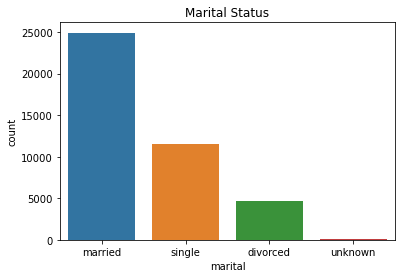

In [293]:
sns.countplot(x = df.marital).set_title('Marital Status')

Text(0.5, 1.0, 'Loan in Default')

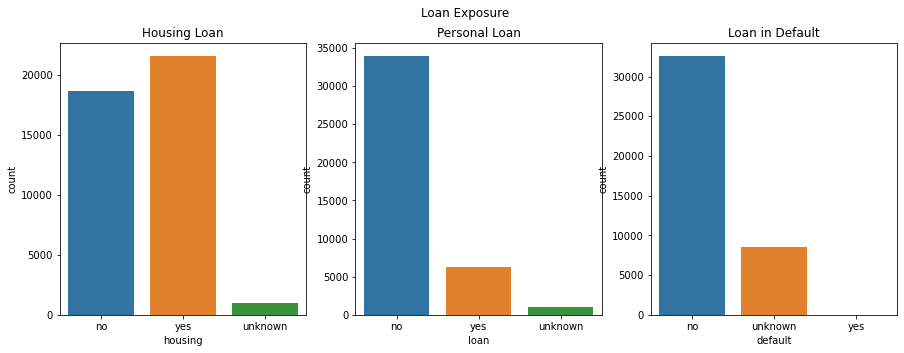

In [294]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle('Loan Exposure')

ax = sns.countplot(ax = axes[0], x = df.housing)
axes[0].set_title('Housing Loan')

sns.countplot(ax = axes[1], x = df.loan)
axes[1].set_title('Personal Loan')

sns.countplot(ax = axes[2], x = df.default)
axes[2].set_title('Loan in Default')


Text(0.5, 1.0, 'Last contact day of the week')

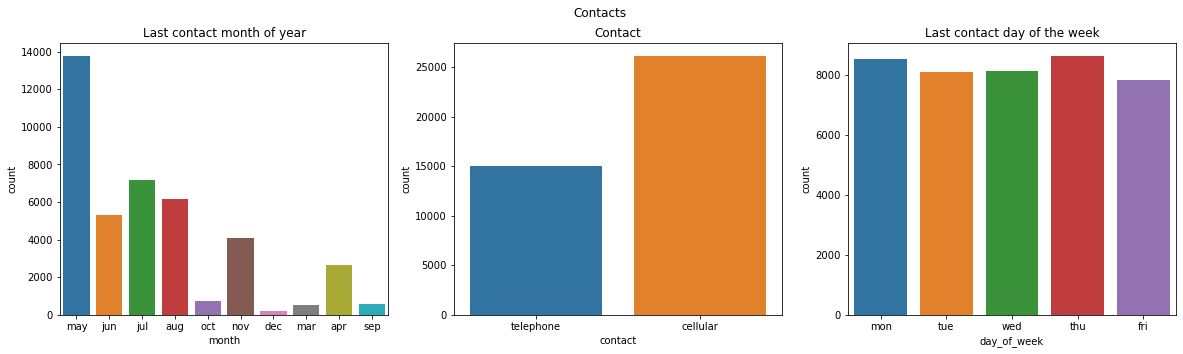

In [295]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Contacts')

ax = sns.countplot(ax = axes[0], x = df.month)
axes[0].set_title('Last contact month of year')
sns.countplot(ax = axes[1], x = df.contact)
axes[1].set_title('Contact')
sns.countplot(ax = axes[2], x = df.day_of_week)
axes[2].set_title('Last contact day of the week')

Text(0.5, 1.0, 'Number of previous contacts')

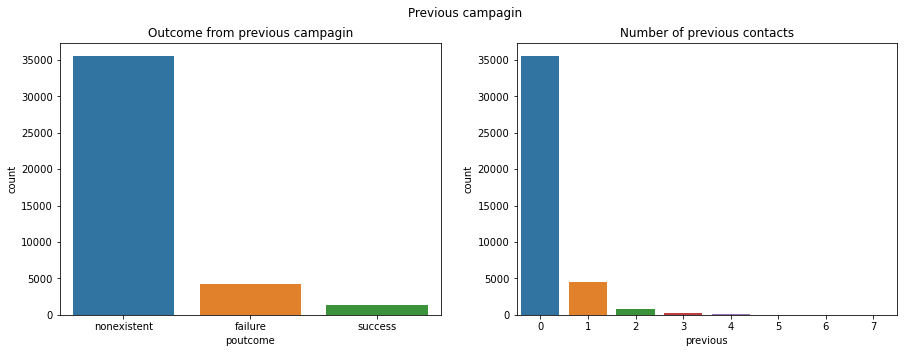

In [296]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Previous campagin')

plt.subplot(121)
sns.countplot(df['poutcome']).set_title('Outcome from previous campagin')

plt.subplot(122)
sns.countplot(df['previous']).set_title('Number of previous contacts')




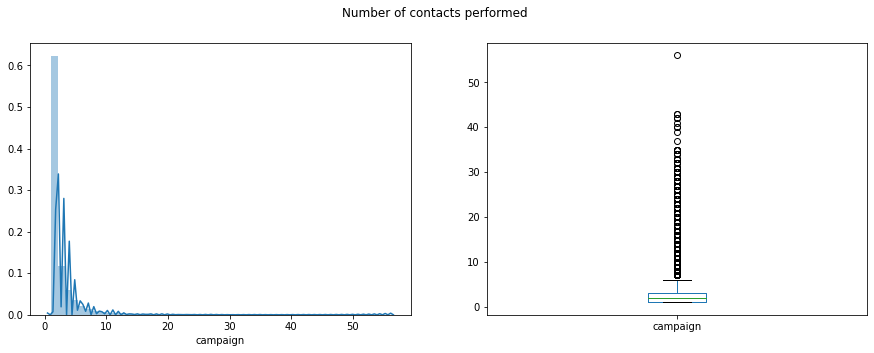

In [297]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of contacts performed')

plt.subplot(121)
sns.distplot(df['campaign'])

plt.subplot(122)
df['campaign'].plot(kind='box')

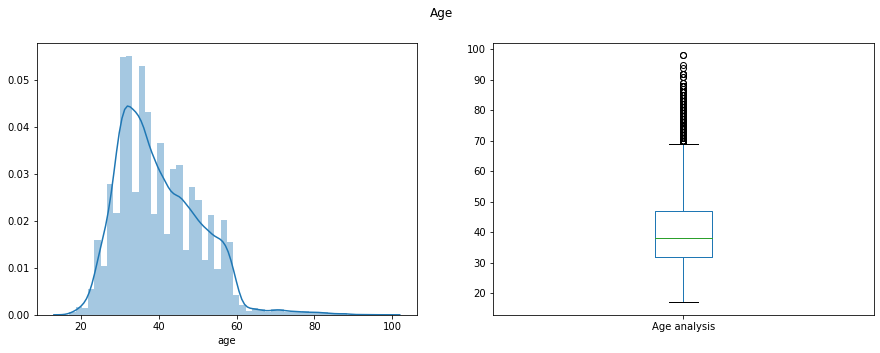

In [298]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Age')

plt.subplot(121)
sns.distplot(df['age'], label='Age')

plt.subplot(122)
df['age'].plot(kind='box', label="Age analysis")

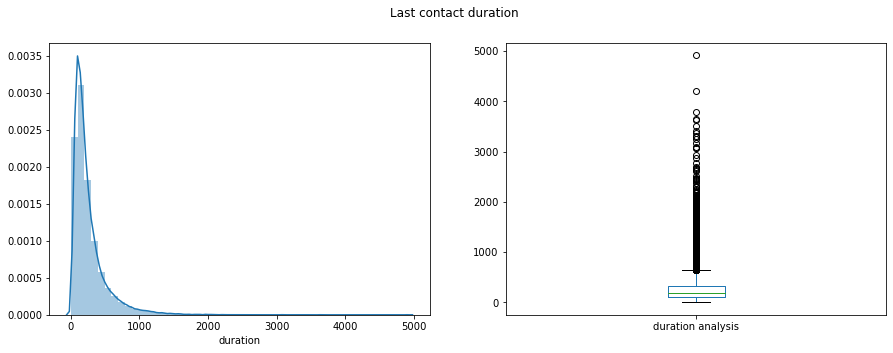

In [299]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Last contact duration')

plt.subplot(121)
sns.distplot(df['duration'], label='duration')

plt.subplot(122)
df['duration'].plot(kind='box', label="duration analysis")

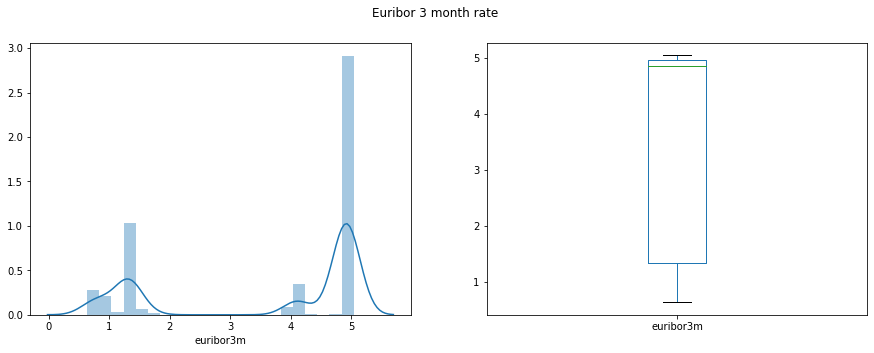

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Euribor 3 month rate')

plt.subplot(121)
sns.distplot(df['euribor3m'], label='euribor3m')

plt.subplot(122)
df['euribor3m'].plot(kind='box', label="euribor3m")

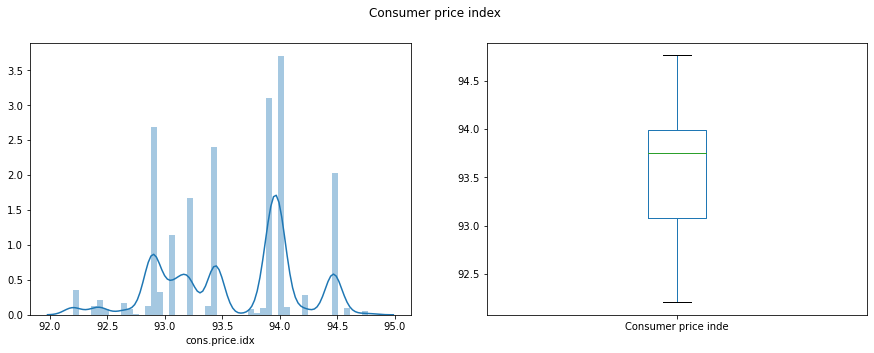

In [301]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Consumer price index')

plt.subplot(121)
sns.distplot(df['cons.price.idx'], label='Consumer price inde')

plt.subplot(122)
df['cons.price.idx'].plot(kind='box', label="Consumer price inde")

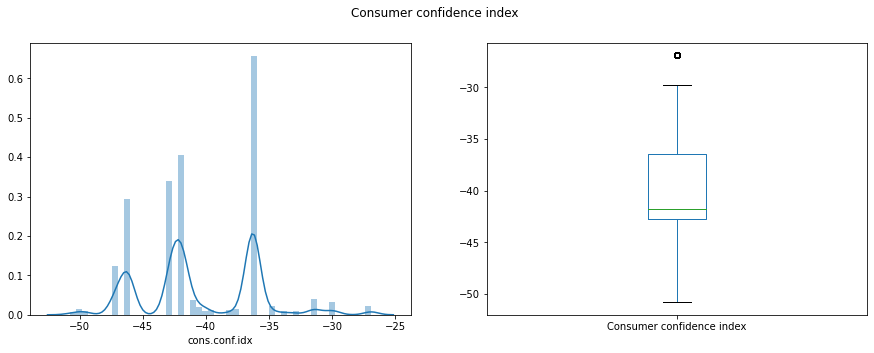

In [302]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Consumer confidence index')

plt.subplot(121)
sns.distplot(df['cons.conf.idx'], label='Consumer confidence index')

plt.subplot(122)
df['cons.conf.idx'].plot(kind='box', label="Consumer confidence index")

## Bivariate Analysis

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

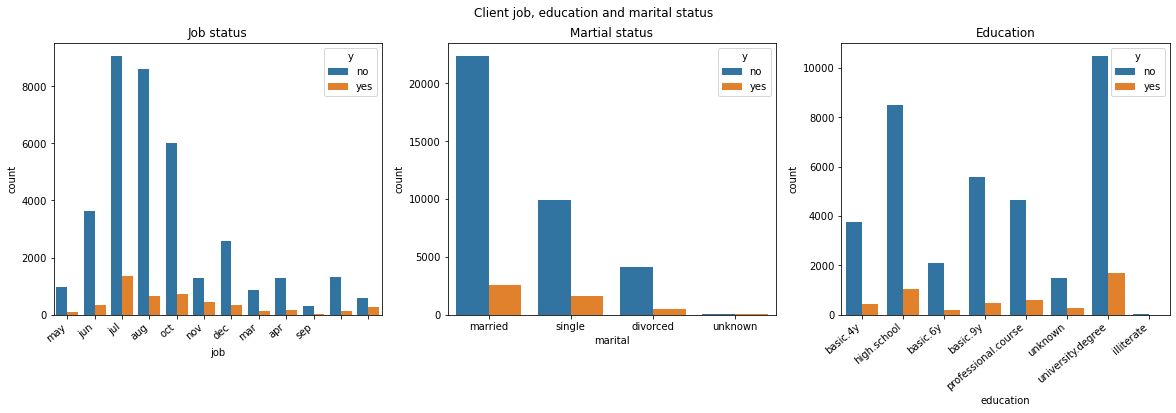

In [303]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Client job, education and marital status')

ax1 = sns.countplot(ax = axes[0], x = df.job, hue='y', data = df)
axes[0].set_title('Job status')
axes[0].set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = sns.countplot(ax = axes[1], x = df.marital, hue='y', data = df)
axes[1].set_title('Martial status')
ax3 = sns.countplot(ax = axes[2], x = df.education, hue='y', data = df)
axes[2].set_title('Education')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

Text(0.5, 1.0, 'Personal Loan')

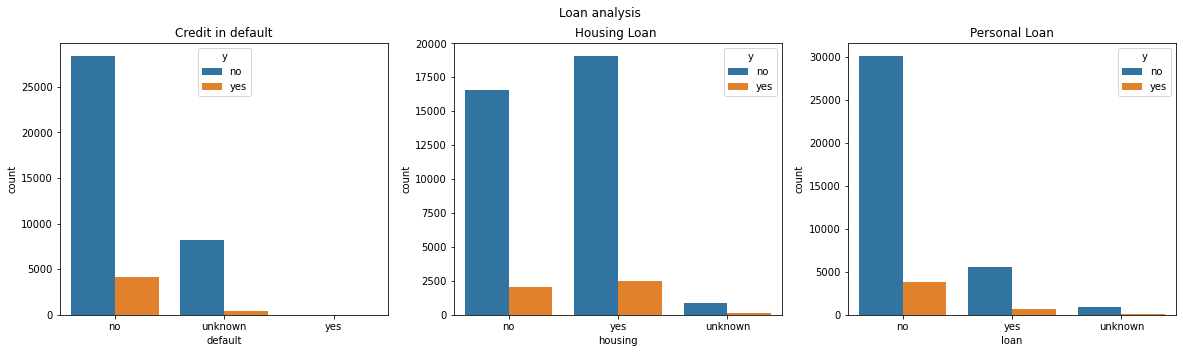

In [304]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Loan analysis')

ax1 = sns.countplot(ax = axes[0], x = df.default, hue='y', data = df)
axes[0].set_title('Credit in default')
ax2 = sns.countplot(ax = axes[1], x = df.housing, hue='y', data = df)
axes[1].set_title('Housing Loan ')
ax3_3 = sns.countplot(ax = axes[2], x = df.loan, hue='y', data = df)
axes[2].set_title('Personal Loan')


Text(0.5, 1.0, 'Last contact -  Day od week ')

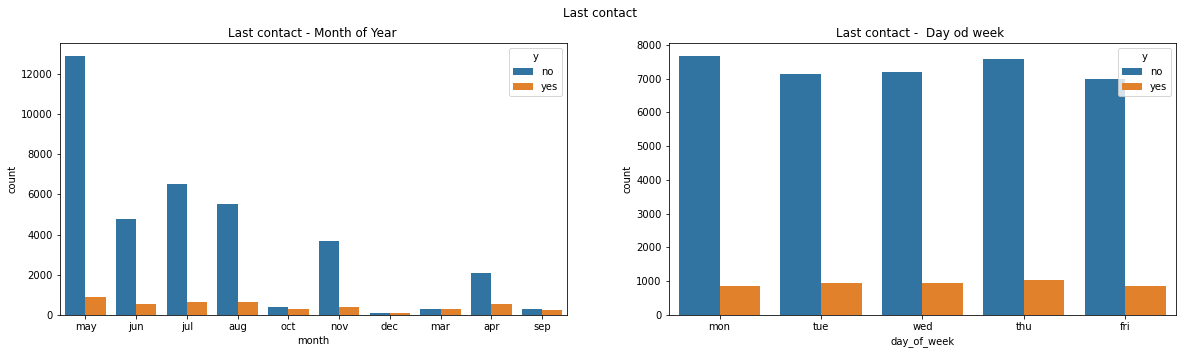

In [305]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Last contact')

ax1 = sns.countplot(ax = axes[0], x = df.month, hue='y', data = df)
axes[0].set_title('Last contact - Month of Year ')

ax2 = sns.countplot(ax = axes[1], x = df.day_of_week, hue='y', data = df)
axes[1].set_title('Last contact -  Day od week ')

Text(0.5, 1.0, 'Number of previous contacts')

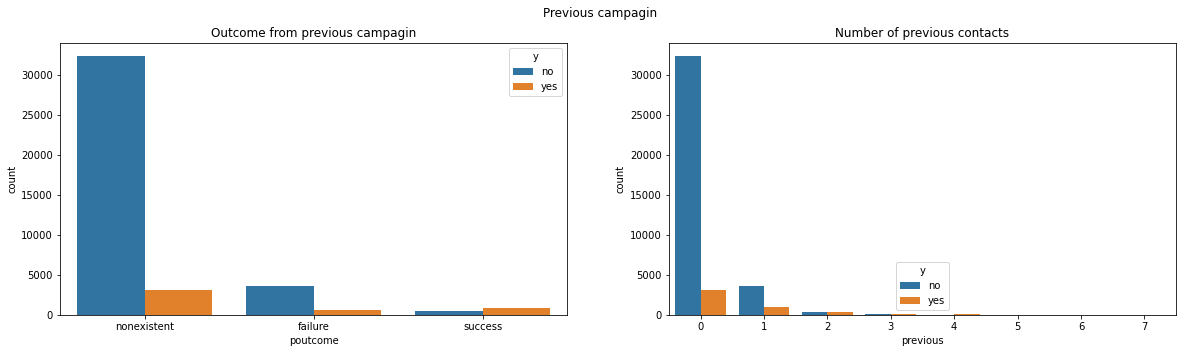

In [306]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Previous campagin')

ax1 = sns.countplot(ax = axes[0], x = df.poutcome, hue='y', data = df)
axes[0].set_title('Outcome from previous campagin')

ax2 = sns.countplot(ax = axes[1], x = df.previous, hue='y', data = df)
axes[1].set_title('Number of previous contacts')

Text(0.5, 1.0, 'Number of contacts performed no class')

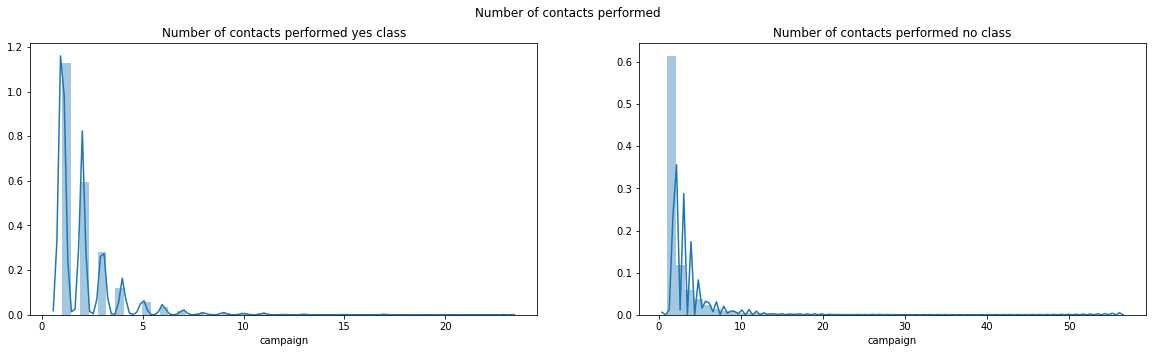

In [307]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Number of contacts performed ')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['campaign']).set_title('Number of contacts performed yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['campaign']).set_title('Number of contacts performed no class')



Text(0.5, 1.0, 'Euribor no class')

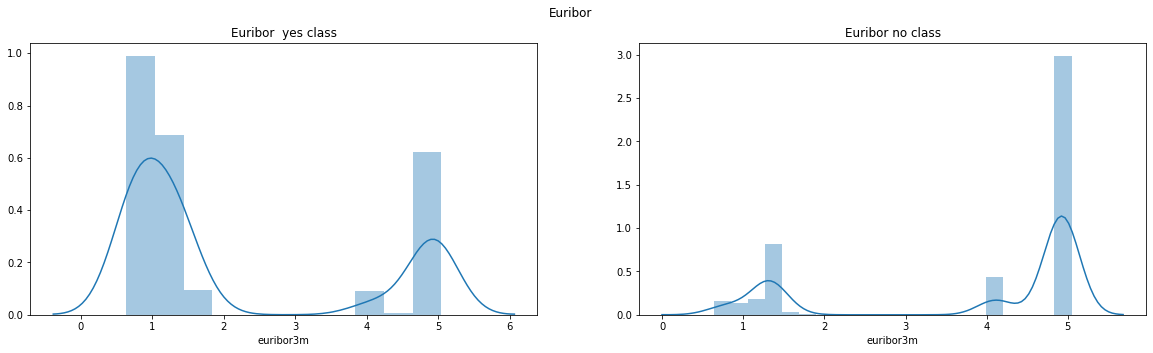

In [308]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Euribor')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['euribor3m']).set_title('Euribor  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['euribor3m']).set_title('Euribor no class')



Text(0.5, 1.0, 'Consumer confidence index no class')

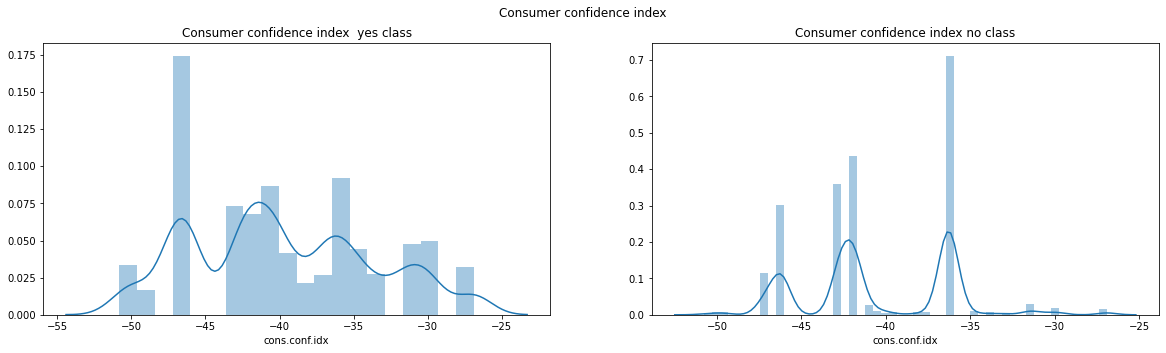

In [309]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Consumer confidence index')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['cons.conf.idx']).set_title('Consumer confidence index  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['cons.conf.idx']).set_title('Consumer confidence index no class')





Text(0.5, 1.0, 'Consumer price index no class')

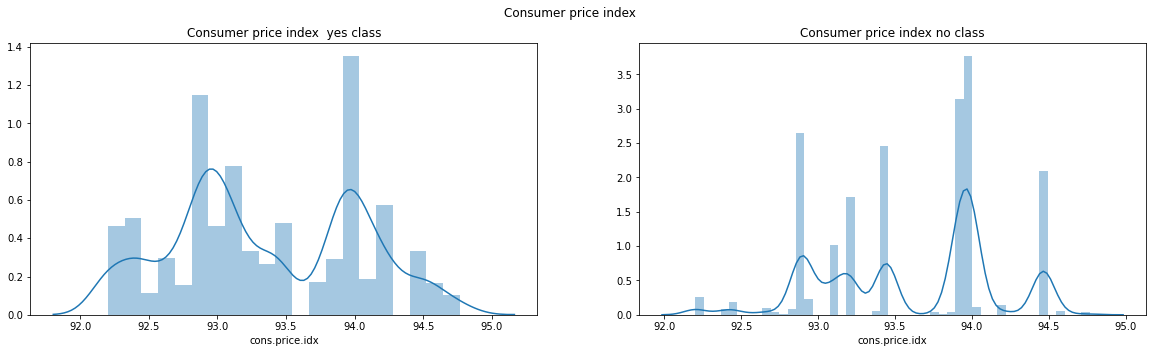

In [310]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Consumer price index')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['cons.price.idx']).set_title('Consumer price index  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['cons.price.idx']).set_title('Consumer price index no class')


## 1. Data preprocessing, normalization, missing data, categorical data

# Missing data (unknown)

In [311]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [312]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [313]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [314]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [315]:
df['job'] = df['job'].replace(['unknown'],None)
df['marital'] = df['marital'].replace(['unknown'],None)
df['education'] = df['education'].replace(['unknown'],None)
df['default'] = df['default'].replace(['unknown'],None)
df['loan'] = df['loan'].replace(['unknown'],None)
df['housing'] = df['housing'].replace(['unknown'],None)

In [316]:

df['job'] = df['job'].fillna(df['job'].value_counts().index[0])
df['default'] = df['default'].fillna(df['default'].value_counts().index[0])
df['marital'] = df['marital'].fillna(df['marital'].value_counts().index[0])
df['education'] = df['education'].fillna(df['education'].value_counts().index[0])
df['loan'] = df['loan'].fillna(df['loan'].value_counts().index[0])
df['housing'] = df['housing'].fillna(df['housing'].value_counts().index[0])

In [317]:
df['housing'].value_counts()

yes    22072
no     19116
Name: housing, dtype: int64

In [318]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

# Scaling

In [319]:
for column in df.columns:
    if df[column].isnull().values.any():
        print(column)

In [320]:
#Normalization

from sklearn.preprocessing import RobustScaler

columns = ['age']
transformer = RobustScaler()

df[columns] = transformer.fit_transform(df[columns])


print("Mean = ", df['age'].mean())
print("Median = ", df['age'].median())
print("STD = ", df['age'].std())

Mean =  0.13493736039623264
Median =  0.0
STD =  0.6947499987289193


In [321]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Category encoding

# One hot encoding

In [322]:
import category_encoders as ce

one_hot_encoding= pd.get_dummies(df[['job','marital','default', 'housing', 'loan', 'poutcome', 'contact', 'education','month',
                                     'day_of_week']])
dataset_one_hot1 = pd.concat([df, one_hot_encoding], axis='columns')


In [323]:
dataset_one_hot1.drop(['job','marital','default', 'housing', 'loan', 'poutcome', 'contact', 'education','month',
                                     'day_of_week'], axis=1, inplace=True)

In [324]:
dataset_one_hot1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.200000,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
1,1.266667,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
2,-0.066667,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
3,0.133333,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
4,1.200000,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.333333,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0
41184,0.533333,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0
41185,1.200000,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0
41186,0.400000,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0


In [325]:
#cat_features = ['education', 'month', 'day_of_week']

#cat_encoder = ce.CatBoostEncoder(cols=('education', 'month', 'day_of_week'))

#dataset_one_hot1[['education', 'month', 'day_of_week']] = cat_encoder.fit_transform(X[['education', 'month', 'day_of_week']], y)

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

In [224]:
#corrmat = dataset_one_hot1.corr()
#top_corr_features = corrmat.index

#plt.figure(figsize=(20,10))

#g = sns.heatmap(dataset_one_hot1[top_corr_features].corr(), 
           #     annot=True,
           #     cmap='RdYlGn')

We can exclude those columns which are having absolute correlation greater than 0.95.

## 3. Classification models
- classical classification models
- deep neural networks

## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect